# Task 1 - Home Value Predictions

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('notebook')
pd.set_option('display.max_columns', None) 

## Load data

In [2]:
# Load train and test data
train = pd.read_csv("./DataFiles/train.csv")
test = pd.read_csv("./DataFiles/test.csv")

# Create df for final predictions
predictions = pd.DataFrame(test["Id"]) # Save "Id" field from the test set

# Store variables in lists based on data type (don't forget to update the lists)
response = ["SalePrice"]
ordinal = ["LotShape","Utilities","LandSlope","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence"]
nominal = ["MSSubClass","MSZoning","Street","Alley","LandContour","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","GarageType","MiscFeature","SaleType"]
numerical = [var for var in train.columns if train.dtypes[var] != object and var not in (ordinal+nominal+response)]

# Check data dimensions
print("Response variable name: SalePrice")
print("Training observations: " + str(train.shape[0]))
print("Test observations: " + str(test.shape[0]))
print("Numerical variables: " + str(len(numerical)))
print("Ordinal variables: " + str(len(ordinal)))
print("Nominal variables: " + str(len(nominal)))

Response variable name: SalePrice
Training observations: 804
Test observations: 1608
Numerical variables: 33
Ordinal variables: 23
Nominal variables: 22


In [3]:
# Peek observations from train
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,8,1978,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,90.0,Gd,Gd,CBlock,TA,TA,No,ALQ,646.0,Unf,0.0,218.0,864.0,GasA,Ex,Y,SBrkr,864,0,0,864,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1978.0,Unf,1.0,336.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,7,2009,WD,136500
1,20,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1950,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Fa,TA,Mn,Rec,1078.0,Unf,0.0,0.0,1078.0,GasA,TA,Y,FuseA,1368,0,0,1368,1.0,0.0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1950.0,RFn,1.0,195.0,TA,TA,Y,0,41,211,0,0,0,NaN,NaN,Shed,900,6,2009,WD,120000
2,60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,341.0,Unf,0.0,772.0,1113.0,GasA,Ex,Y,SBrkr,1113,858,0,1971,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,RFn,2.0,689.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,253000
3,160,FV,24.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,SLvl,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,216.0,Gd,TA,PConc,Gd,TA,No,GLQ,600.0,Unf,0.0,72.0,672.0,GasA,Ex,Y,SBrkr,684,720,0,1404,1.0,0.0,2,1,3,1,Gd,5,Typ,0,NaN,Detchd,1999.0,Unf,2.0,462.0,TA,TA,Y,20,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,170000
4,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1916,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,815.0,815.0,GasA,Ex,Y,SBrkr,815,875,0,1690,0.0,0.0,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1916.0,Unf,1.0,225.0,TA,TA,Y,0,0,330,0,0,0,NaN,NaN,NaN,0,7,2006,ConLw,144000


In [4]:
# Peek observations from test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,1,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,4,1910,2006,Hip,CompShg,MetalSd,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,247.0,Rec,465.0,310.0,1022.0,GasW,TA,N,SBrkr,1022,0,0,1022,1.0,0.0,1,0,2,1,TA,4,Maj2,0,NaN,Detchd,1956.0,Unf,1.0,280.0,TA,TA,Y,0,30,226,0,0,0,NaN,NaN,NaN,0,6,2009,WD
1,2,190,RL,90.0,15750,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,2fmCon,1Story,5,5,1953,1953,Hip,CompShg,MetalSd,MetalSd,BrkFace,56.0,TA,TA,CBlock,TA,TA,Mn,BLQ,841.0,Unf,0.0,324.0,1165.0,GasA,TA,Y,SBrkr,1336,0,0,1336,1.0,0.0,1,0,2,1,TA,5,Typ,2,Gd,Attchd,1953.0,Unf,1.0,375.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD
2,3,50,RL,65.0,6435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,972.0,972.0,GasA,Gd,Y,SBrkr,972,605,0,1577,0.0,0.0,1,0,3,1,Fa,6,Typ,1,Gd,Detchd,1939.0,Unf,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD
3,4,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,6,1980,1988,Gable,CompShg,HdBoard,HdBoard,BrkFace,280.0,TA,TA,CBlock,Gd,TA,Mn,Unf,0.0,Unf,0.0,738.0,738.0,GasA,TA,Y,SBrkr,1277,767,0,2044,0.0,0.0,2,1,3,1,TA,7,Min1,1,TA,Attchd,1980.0,Unf,2.0,489.0,TA,TA,Y,28,73,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD
4,5,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,2001,Hip,CompShg,Wd Sdng,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,494.0,Unf,0.0,521.0,1015.0,GasA,Gd,Y,SBrkr,1384,0,0,1384,1.0,0.0,1,0,2,1,TA,6,Min1,0,NaN,Attchd,2001.0,Unf,2.0,896.0,TA,TA,Y,75,0,0,323,0,0,NaN,NaN,Shed,400,6,2006,WD


## Preprocess the data

### Remove severe outliers (train only)

- Remember to **not** remove any data from the test set.
- Based on the initial EDA, we have not found any severe outliers in the training set.
- We should revisit this step if severe outliers are detected in subsequent EDAs.

### Combine training and test for cleaning

In [5]:
# Remember the number of rows in train so that we can split it again
nrows_train = train.shape[0]

# Get all relevant columns from test
test = test.drop("Id", axis=1) # remove "Id" column from test
cols = list(test.columns)

# Append test to train aligned by column
data = (train[cols]).append(test[cols])
data = data.reset_index(drop=True)

### Check missing values

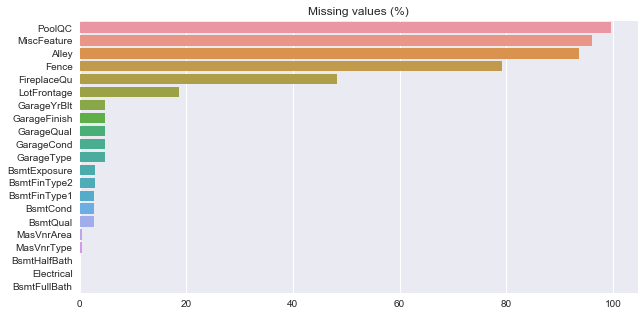

In [6]:
# Check missing values
fig, ax = plt.subplots(figsize=(10,5))
missing = data.isnull().sum().divide(data.shape[0]).multiply(100)
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
ax = sns.barplot(x=missing, y=missing.index)
ax.set(title="Missing values (%)")
plt.show()

Notes about missing values:
- There is a lot of missing data for **PoolQC**, **MiscFeature**, **Fence** and **FireplaceQu**. These all correspond to 'additional' features of a house and, therefore, they are likely to not exist for most houses. We should be mindful of these 'additional' features when including them in our models. For example, they may be better represented as dummy or interaction terms.
- It is likely that the **Garage**, **Basement** and **Masonry Veneer** have some missing values because some houses may not have a garage, basement or mansonry veneer.

### Impute "None" values

- As suggested by the data documentation, many of the missing values actually represent a "None" value.

In [7]:
# List of variables where NA corresponds to "None" (see data documentation)
treat = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1","BsmtFinType2","MasVnrType"]

# Treat missing values
data[treat] = data[treat].fillna("None")

### Assign discrete numbers to ordinal data

In [8]:
# Define order for each ordinal variable (see the DataDocumentation.txt file)
data[ordinal] = data[ordinal].replace({
    "LotShape": {"IR3": 1,"IR2": 2,"IR1":3,"Reg":4},
    "Utilities": {"ELO": 1,"NoSeWa": 2,"NoSewr":3,"AllPub":4},
    "LandSlope": {"Sev": 1,"Mod": 2,"Gtl":3},
    "ExterQual": {"Po": 1,"Fa": 2,"TA":3,"Gd":4,"Ex":5},
    "ExterCond": {"Po": 1,"Fa": 2,"TA":3,"Gd":4,"Ex":5},
    "BsmtQual": {"None": 0,"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "BsmtCond": {"None": 0,"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "BsmtExposure": {"None": 0,"No": 1,"Mn":2,"Av":3,"Gd":4},
    "BsmtFinType1": {"None": 0,"Unf": 1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
    "BsmtFinType2": {"None": 0,"Unf": 1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6},
    "HeatingQC": {"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "Electrical": {"Mix": 1,"FuseP":2,"FuseF":3,"FuseA":4,"SBrkr":5},
    "KitchenQual": {"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "Functional": {"Sal": 1,"Sev":2,"Maj2":3,"Maj1":4,"Mod":5,"Min2":6,"Min1":7,"Typ":8},
    "FireplaceQu": {"None":0,"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "GarageFinish": {"None":0,"Unf": 1,"RFn":2,"Fin":3},
    "GarageQual": {"None":0,"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "GarageCond": {"None":0,"Po": 1,"Fa":2,"TA":3,"Gd":4,"Ex":5},
    "PavedDrive": {"N": 1,"P":2,"Y":3},
    "PoolQC": {"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4},
    "Fence": {"None":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}
})

### Check remaining missing values

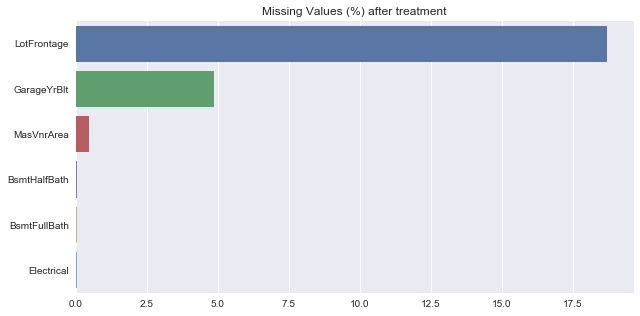

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
missing = data.isnull().sum().divide(data.shape[0]).multiply(100)
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
ax = sns.barplot(x=missing, y=missing.index)
ax.set(title="Missing Values (%) after treatment")
plt.show()

Notes about the remaining missing values:
- **LotFrontage** actually has missing values. We will impute the median "LotFrontage" based on the "Neighborhood".
- **GarageYrBlt** only has missing values when there is no garage. We will drop this variable as we do not feel that it is relevant.
- **MasVnrArea** only has missing values when there is no masonry veneer. We can assume it to be zero.
- **BsmtHalfBath** and **BsmtFullBath** only have missing values when there is no basement. We can assume it to be zero.
- **Electrical** has one missing value which we will impute with the global median.

In [10]:
# Treat remaining missing values for LotFrontage
treat = ["LotFrontage"]
val = data.groupby('Neighborhood')[treat].transform('median')
data[treat] = data[treat].fillna(val)

# Drop GarageYrBlt
weak_predictors = ["GarageYrBlt"]
numerical = [var for var in numerical if var not in weak_predictors]
data = data.drop(weak_predictors, axis=1)

# Treat remaining missing values for MasVnrArea
treat = ["MasVnrArea"]
val = 0
data[treat] = data[treat].fillna(val)

# Treat remaining missing values for BsmtFullBath and BsmtHalfBath
treat = ["BsmtFullBath","BsmtHalfBath"]
val = 0
data[treat] = data[treat].fillna(val)

# Treat remaining missing values for Electrial
treat = ["Electrical"]
val = data[treat].median()
data[treat] = data[treat].fillna(val).astype(int)

# Check again for missing values
pd.DataFrame(data.isnull().sum(), columns=["count(NaN)"])[data.isnull().sum() > 0].transpose()

,LotFrontage
count(NaN),3


Notes about **LotFrontage**:
- We could not compute the median "LotFrontage" for 3 instances because we do not have data for those specific "Neighborhoods".
- For these 3 instances, we will use the global median.

In [11]:
# Treat remaining 3 missing values for "LotFrontage" using the global median.
treat = ["LotFrontage"]
val = data[treat].median()
data[treat] = data[treat].fillna(val)

### Summarise preprocessed data

In [12]:
# Check data types and categories
from tabulate import tabulate

output = [["Numerical Variables", "Data Type"]]
for var in data[numerical]:
    output.append([var, data[var].dtypes])
print("\n" + tabulate(output, headers="firstrow", tablefmt="rst"))

output = [["Ordinal Variables", "Categories"]]
for var in data[ordinal]:
    output.append([var, np.sort(data[var].unique())])
print("\n" + tabulate(output, headers="firstrow", tablefmt="rst"))

output = [["Nominal Variables", "Categories"]]
for var in data[nominal]:
    output.append([var, data[var].unique()])
print("\n" + tabulate(output, headers="firstrow", tablefmt="rst"))


=====================  ===========
Numerical Variables    Data Type
=====================  ===========
LotFrontage            float64
LotArea                int64
YearBuilt              int64
YearRemod/Add          int64
MasVnrArea             float64
BsmtFinSF1             float64
BsmtFinSF2             float64
BsmtUnfSF              float64
TotalBsmtSF            float64
1stFlrSF               int64
2ndFlrSF               int64
LowQualFinSF           int64
GrLivArea              int64
BsmtFullBath           float64
BsmtHalfBath           float64
FullBath               int64
HalfBath               int64
BedroomAbvGr           int64
KitchenAbvGr           int64
TotRmsAbvGrd           int64
Fireplaces             int64
GarageCars             float64
GarageArea             float64
WoodDeckSF             int64
OpenPorchSF            int64
EnclosedPorch          int64
3SsnPorch              int64
ScreenPorch            int64
PoolArea               int64
MiscVal                int64
MoSold

### Create dummy variables

Here, we will create all possible dummy variables.
It is more convenient to do this while the data set is joined.

In [13]:
# Make sure all existing nominal columns contain strings
train[nominal] = train[nominal].astype(str)

# Create dummies for all of the existing nominal values
df = pd.get_dummies(train[nominal], drop_first=True)
dummies = list(df.columns)
data = data.join(df)

### Split data back into training and test

- Now that **all data** is clean and consistent, we can split it back into the original training and test sets.
- We should remember that any **scaling**, **transformation** or **feature engineering** should still be performed on **all data** (training and test sets).

In [14]:
# Split back to train and test
sale_price = train[["SalePrice"]]
train = data.iloc[0:nrows_train, :]
train = train.join(sale_price)

test = data.iloc[nrows_train: , :]
test = test.reset_index(drop=True)

# Export preprocessed training set to analyse in Excel (optional)
#train.to_csv("train_preprocessed.csv", index=False)

## EDA 1

- This is the first iteration of EDA.
- We aim to understand the most promininent features in the data.
- Note that we only do EDA on the training set. We are not allowed to gain any information from the test set (this is cheating).
- Note that we should continue to revisit EDA as we conduct feature selection/engineering.

### *Explore response variable*

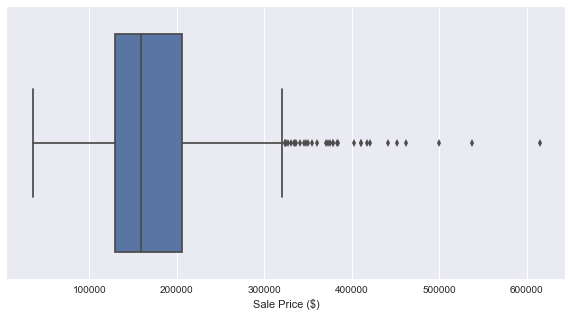

In [15]:
# Box plot of "SalePrice"
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(train[response])
ax.set(xlabel="Sale Price ($)")
plt.show()

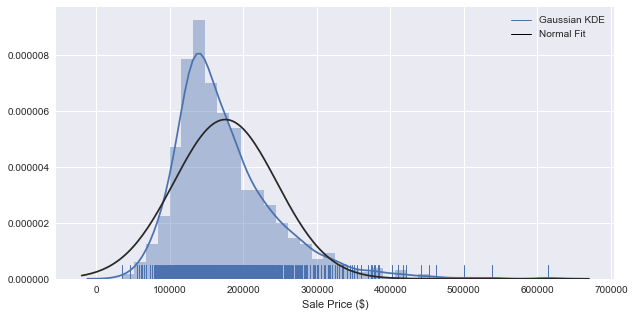

In [16]:
# Histogram and KDE of "SalePrice"
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(train[response], kde=True, rug=True, fit=norm)
ax.set(xlabel="Sale Price ($)")
leg = ax.legend(["Gaussian KDE", "Normal Fit"])
leg.legendHandles[1].set_color("black")
plt.show()

The distribution of "SalePrice" is:
- Not normal
- Right skewed
- Leptokurtic

Linear models tend to perform better with normal distributions.  
- Consider applying a **log transformation** to SalePrice.
- Don't forget to check the **residual diagnostics** later.

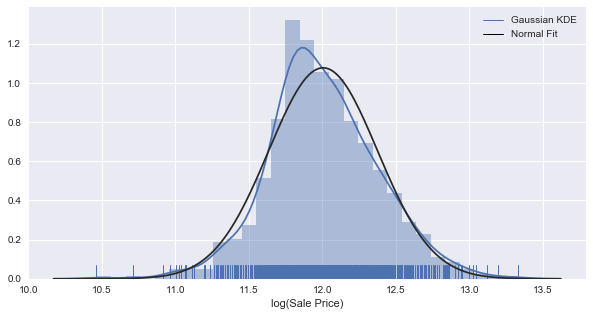

In [17]:
# Apply a log transformation to "SalePrice" in the training set.
train["LogSalePrice"] = np.log1p(train[response])

# "SalePrice" does not exist in the test set so we don't need to transform it.

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(train["LogSalePrice"], kde=True, rug=True, fit=norm)
ax.set(xlabel="log(Sale Price)")
leg = ax.legend(["Gaussian KDE", "Normal Fit"])
leg.legendHandles[1].set_color("black")
plt.show()

### *Explore numerical variables*

In [18]:
# Check the summaries
train[numerical].describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,804.0,68.94,20.24,21.0,60.00,70.0,80.00,155.0
LotArea,804.0,10016.71,7721.43,1300.0,7513.50,9469.5,11438.00,164660.0
YearBuilt,804.0,1969.80,28.52,1879.0,1953.00,1971.0,1997.25,2009.0
YearRemod/Add,804.0,1983.02,20.60,1950.0,1964.00,1991.0,2002.00,2010.0
MasVnrArea,804.0,100.13,179.48,0.0,0.00,0.0,150.00,1224.0
BsmtFinSF1,804.0,434.91,415.95,0.0,0.00,388.5,697.25,2257.0
BsmtFinSF2,804.0,57.37,187.09,0.0,0.00,0.0,0.00,1526.0
BsmtUnfSF,804.0,527.41,413.55,0.0,212.25,440.0,769.75,1958.0
TotalBsmtSF,804.0,1019.69,397.87,0.0,792.75,967.0,1232.00,2846.0
1stFlrSF,804.0,1128.17,357.35,442.0,864.00,1071.0,1337.00,2696.0


In [19]:
# Pearson correlation of each numerical variable with the response "SalePrice"
corr = train[numerical + response].corr()[response]
corr = corr.sort_values(by="SalePrice", ascending=False)
corr.transpose()

,SalePrice,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemod/Add,MasVnrArea,Fireplaces,TotRmsAbvGrd,BsmtFinSF1,WoodDeckSF,LotFrontage,HalfBath,OpenPorchSF,LotArea,2ndFlrSF,BsmtFullBath,BedroomAbvGr,BsmtUnfSF,ScreenPorch,YrSold,BsmtFinSF2,PoolArea,3SsnPorch,MoSold,LowQualFinSF,MiscVal,BsmtHalfBath,KitchenAbvGr,EnclosedPorch
SalePrice,1.0,0.73755,0.644525,0.643195,0.634589,0.628522,0.561448,0.50924,0.505426,0.492913,0.485422,0.478874,0.464225,0.373134,0.344954,0.341109,0.328623,0.293212,0.291682,0.277405,0.142497,0.122982,0.105302,0.057574,0.045586,0.038005,0.028102,-0.000157,-0.043782,-0.052744,-0.056146,-0.114374,-0.128426


The following **numerical features** have the strongest correlations with "SalePrice":
- GrLivArea
- GarageArea
- GarageCars
- TotalBsmtSF
- 1stFlrSF
- YearBuilt

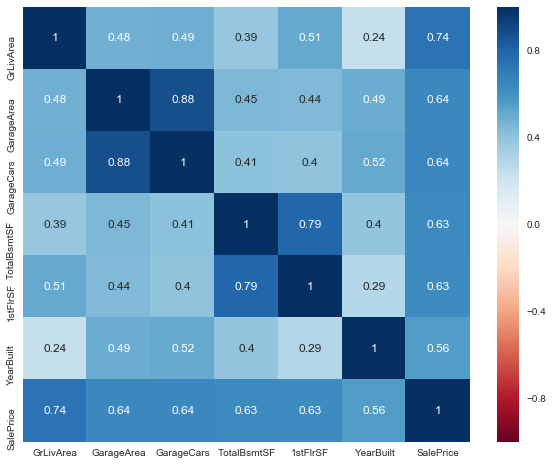

In [20]:
# Correlation heatmap of the most correlated numerical variables
corr = train[["GrLivArea","GarageArea","GarageCars","TotalBsmtSF","1stFlrSF","YearBuilt"] + response].corr()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

Notes about numerical variables:
- **1stFlrSF** and **TotalBsmtSF** are highly correlated.  
- **GarageCars** and **GarageArea** are highly correlated.

Let's further investiage the following variables:
1. **GrLivArea** => Above grade (ground) living area square feet
2. **GarageArea** => Size of garage in square feet
3. **TotalBsmtSF** => Total square feet of basement area
4. **YearBuilt** => Original construction date

In [21]:
# This function plots the KDE and scatter/regression of numerical variables
def plotnum(var, resp, df):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[var], kde=True, rug=True, fit=norm, ax=ax1)
    leg = ax1.legend(["Gaussian KDE", "Normal Fit"])
    leg.legendHandles[1].set_color("black")
    sns.regplot(x=var, y=resp, data=df, line_kws={"color":"darkred"}, ax=ax2)
    return fig, (ax1,ax2)

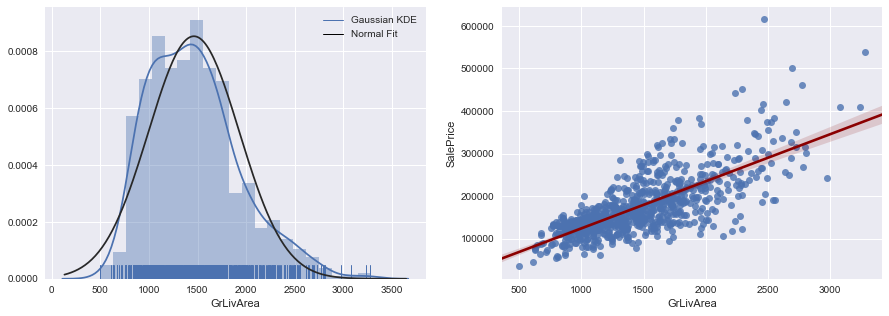

In [22]:
# KDE and RegPlot of GrLivArea
fig, (ax1,ax2) = plotnum("GrLivArea", "SalePrice", train)
plt.show()

Notes:
- "GrLivArea" includes area for all stories
- Good linearity with "SalePrice"
- Distribution is slightly right skewed
- Consider transformation

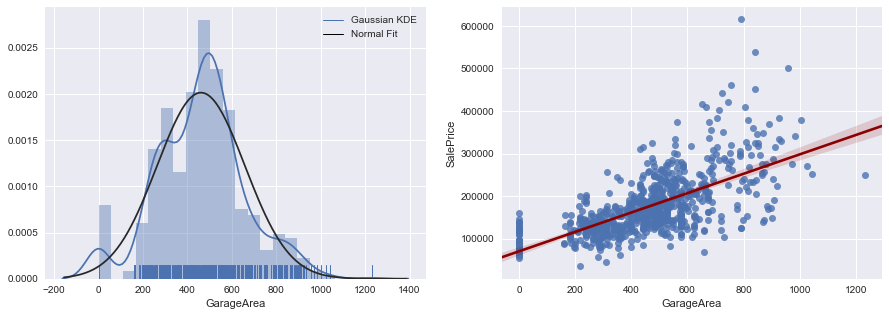

In [23]:
# KDE and RegPlot of GarageArea
fig, (ax1,ax2) = plotnum("GarageArea", "SalePrice", train)
plt.show()

Notes:
- Good linearity with "SalePrice"
- GarageArea is 0 for houses with no garage
- Consider using a dummy variable to account for this

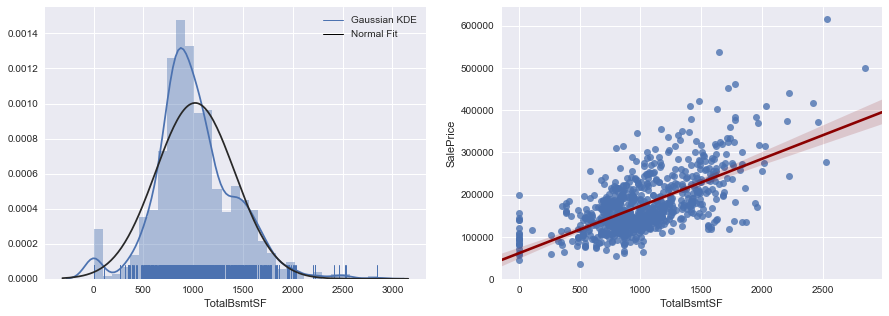

In [24]:
# KDE and RegPlot of TotalBsmtSF
fig, (ax1,ax2) = plotnum("TotalBsmtSF", "SalePrice", train)
plt.show()

Notes:
- Good linearity with "SalePrice"
- Distribution is right skewed
- Consider transformation
- TotalBsmtSF is 0 for houses with no basement
- Consider using a dummy variable to account for this

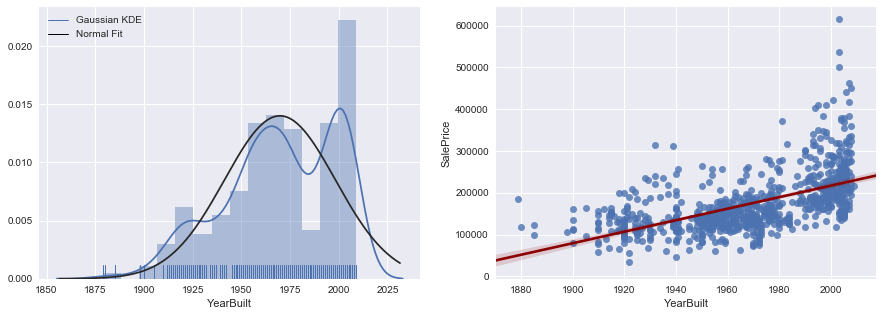

In [25]:
# KDE and RegPlot of YearBuilt
fig, (ax1,ax2) = plotnum("YearBuilt", "SalePrice", train)
plt.show()

Notes:
- Distribution is not normal
- Distribution is multimodal
- Difficult to transform
- Consider binning into different age groups (convert to ordinal)
  - If less than 1930 => Old
  - If less greater 1980 => New
  - Else => Average

### *Explore ordinal variables*

In [26]:
# Spearman correlation of each ordinal variable with the response
corr = train[ordinal + response].corr(method="spearman")[response]
corr = corr.sort_values(by="SalePrice", ascending=False)
corr.transpose()

,SalePrice,OverallQual,BsmtQual,ExterQual,KitchenQual,GarageFinish,FireplaceQu,HeatingQC,BsmtFinType1,GarageQual,PavedDrive,BsmtExposure,GarageCond,Electrical,BsmtCond,BsmtFinType2,Utilities,Functional,PoolQC,ExterCond,LandSlope,OverallCond,Fence,LotShape
SalePrice,1.0,0.786797,0.661274,0.637461,0.615662,0.58898,0.525293,0.467757,0.380815,0.358586,0.349236,0.34366,0.338723,0.304007,0.259622,0.067497,0.060591,0.048507,0.03767,0.019748,-0.118226,-0.154689,-0.209353,-0.37262


The following ordinal features have the strongest correlations with "SalePrice":
- OverallQual
- BsmtQual
- ExterQual
- KitchenQual
- GarageFinish

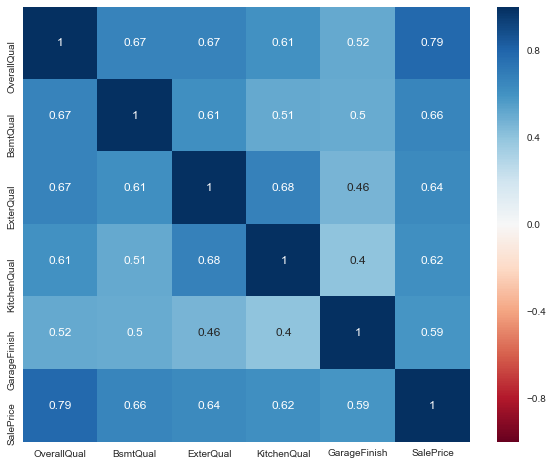

In [27]:
# Correlation heatmap of the most relevant ordinal variables
corr = train[["OverallQual","BsmtQual","ExterQual","KitchenQual","GarageFinish"] + response].corr(method="spearman")

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="RdBu")
plt.show()

Note:
- OverallQual appears to be an engineered feature as it is highly correlated with the other quality variables.
- We should try to avoid multicollinearity in Multiple Linear Regression and be cautious when using "OverallQual" as a predictor

In [28]:
# This function plots the count, box-whisker and scatter/regression of ordinal variables
def plotord(var, resp, df):
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
    sns.countplot(x=var, data=df, ax=ax1)
    sns.boxplot(x=var, y=resp, data=df, ax=ax2)
    sns.regplot(x=var, y=resp, data=df, line_kws={"color":"darkred"}, ax=ax3)
    return fig, (ax1,ax2,ax3)

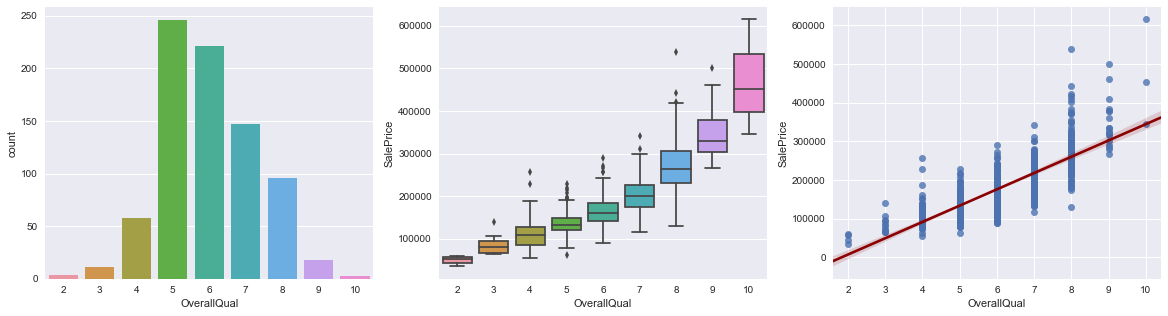

In [29]:
# Countplot, Boxplot and Regplot of "OverallQual"
plotord("OverallQual", "SalePrice", train)
plt.show()

Notes:
- "OverallQual" appears to have some linearity so we could also consider it as a numerical variable
- We need to be careful as we don't know how "OverallQual" has been calculated
- We should check it rigorously for multicollinearity during variable selection

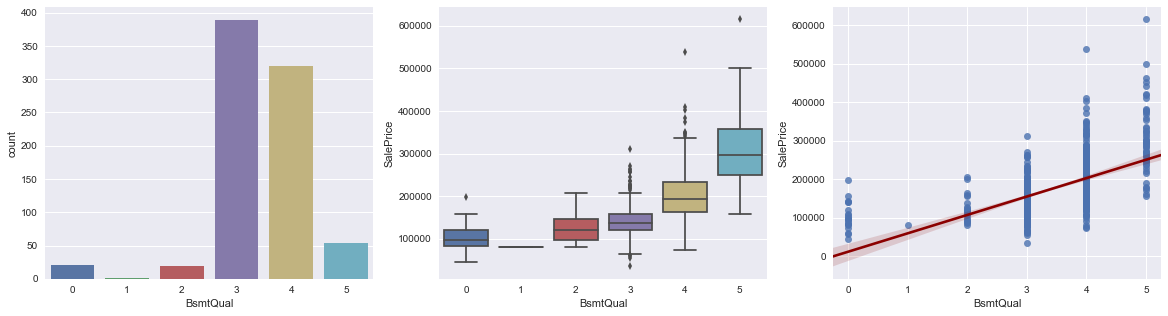

In [30]:
# Countplot, Boxplot and Regplot of "BsmtQual"
plotord("BsmtQual", "SalePrice", train)
plt.show()

Notes:
- Consider combining 1, 2 and 3

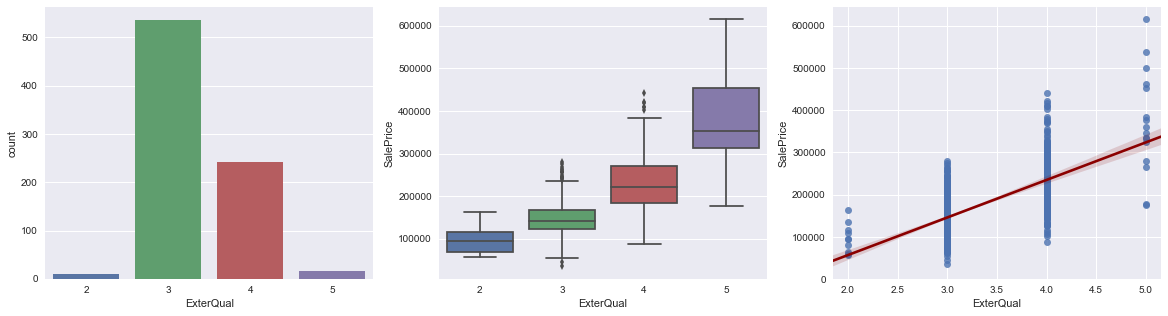

In [31]:
# Countplot, Boxplot and Regplot of "ExterQual"
plotord("ExterQual", "SalePrice", train)
plt.show()

Notes:
- Good linearity

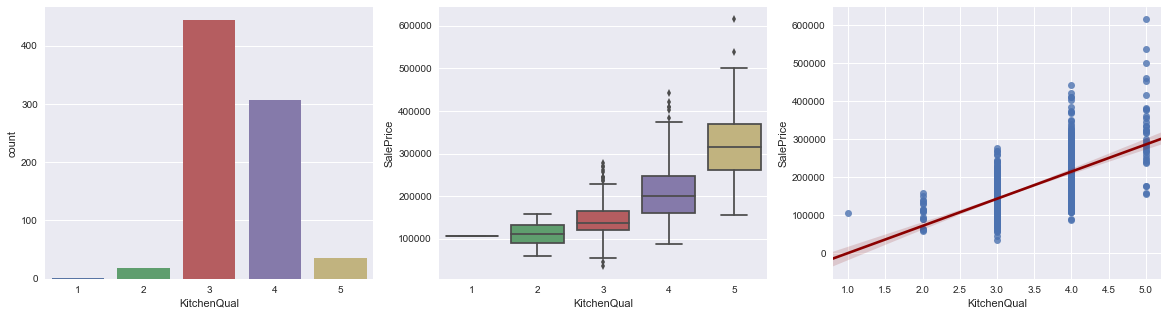

In [32]:
# Countplot, Boxplot and Regplot of "KitchenQual"
plotord("KitchenQual", "SalePrice", train)
plt.show()

Notes:
- Consider combining 1, 2 and 3

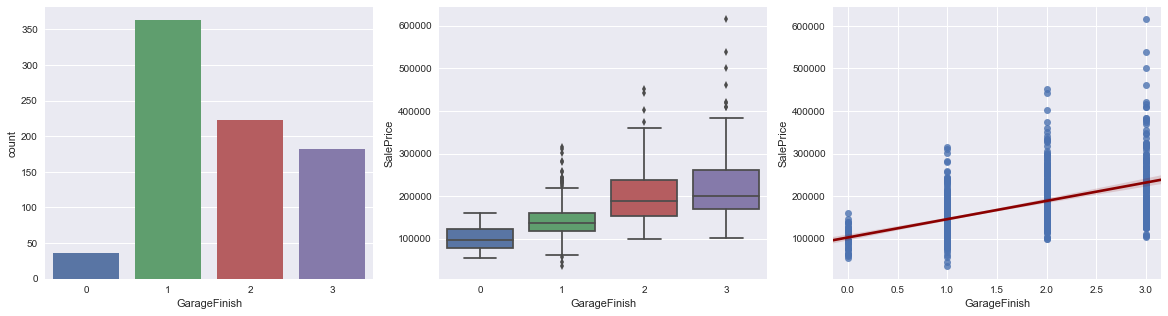

In [33]:
# Countplot, Boxplot and Regplot of "GarageFinish"
plotord("GarageFinish", "SalePrice", train)
plt.show()

Notes:
- Consider combining 2 and 3

### *Explore nominal variables*

In [34]:
# This function for plots the count and box-whisker of nominal variables
def plotnom(var, resp, df):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    sns.countplot(x=var, data=df, ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    sns.boxplot(x=var, y=resp, data=df, ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
    return fig, (ax1,ax2)

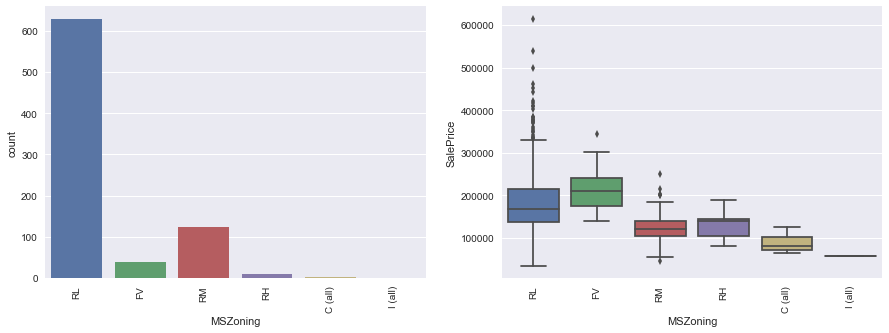

In [35]:
# Countplot and Boxplot of "MSZoning"
fig, (ax1,ax2) = plotnom("MSZoning", "SalePrice", train)
plt.show()

Notes:
- It appears that expensive houses are located in low density zones (RL) although there can be very high variability
- It seems that medium/high density residential zones have lower "SalePrice"
- Although non-residential zones seem to have lower "SalePrice" we do not have enough data to be certain

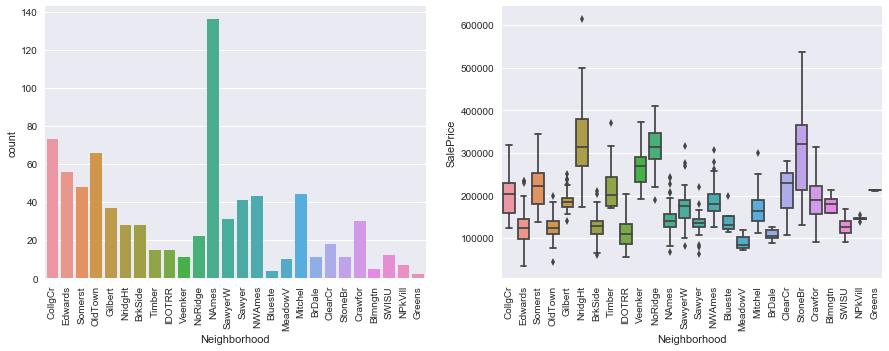

In [36]:
# Countplot and Boxplot of "Neighborhood"
fig, (ax1,ax2) = plotnom("Neighborhood", "SalePrice", train)
plt.show()

It seems that houses in "NridgHt" tend to sell for a higher price.
Perhaps we can consider a neighborhood to be good if its median is close to 300k:
- NridgHt
- Veenker
- NoRidge
- StoneBr

There is also a map of the City of Ames that is available online:  
https://www.zillow.com/homes/Stone-Brooke-Ames-IA_rb/
 
"NridgHt" and "NoRidge" seem like good central locations that are close to everything.  
"StoneBr" is close to the lake.  
"Veenker" is close to a golf course.

Similarly, we can consider a neighborhood to be bad if the median is close to 100K:
- Edwards
- OldTown
- DOTRR
- NAmes
- MeadowV
- BrDale

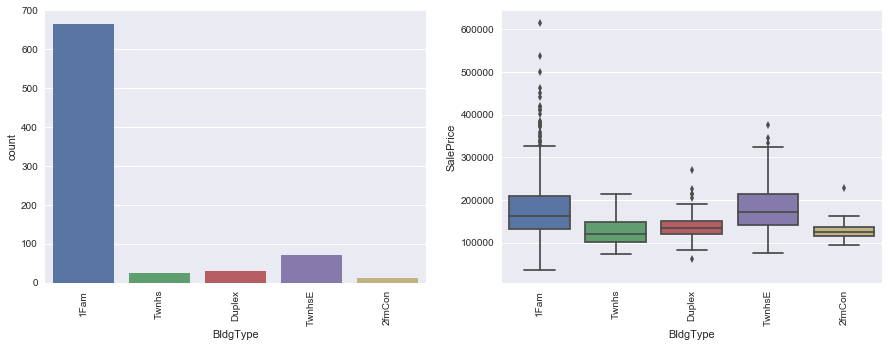

In [37]:
# Countplot and Boxplot of "BldgType"
fig, (ax1,ax2) = plotnom("BldgType", "SalePrice", train)
plt.show()

Notes:
- It appears that "Twnhs", "Duplex" and "2fmCon" tend to have lower "SalePrice" than "1Fam"

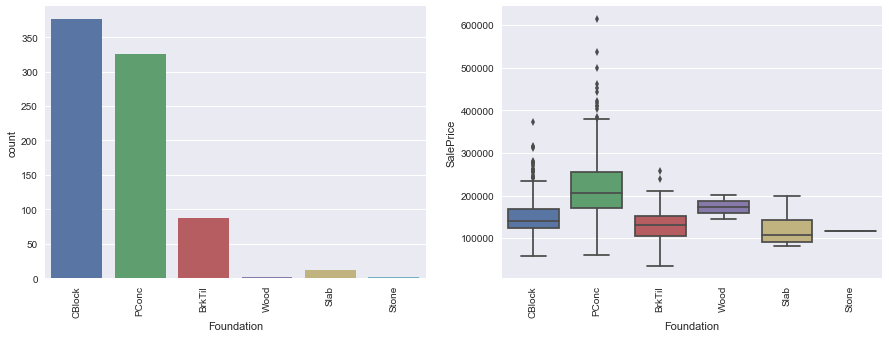

In [38]:
# Countplot and Boxplot of "Foundation"
fig, (ax1,ax2) = plotnom("Foundation", "SalePrice", train)
plt.show()

Notes:
- It is often said that "Foundation" is important to a house
- It seems that houses with higher "SalePrice" tend to have "PConc" as the foundation

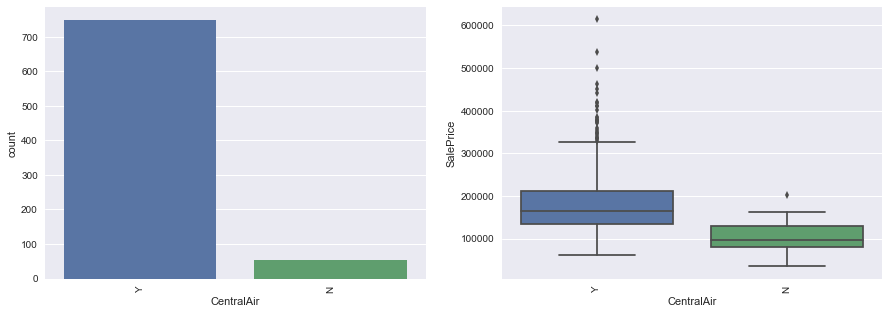

In [39]:
# Countplot and Boxplot of "CentralAir"
fig, (ax1,ax2) = plotnom("CentralAir", "SalePrice", train)
plt.show()

Notes:
- It appears that "CentralAir" might be important to the "SalePrice"

### Summary of EDA 1

- The response variable "SalePrice" may require a log transformation (remember to check the residual diagnostics)
- The predictor variables with the strongest influence on the "SalePrice" seem to be related to the following factors:
  - Area: general living, basement, garage
  - Age: years since date built
  - Quality: kitchen, basement, external, overall? 
  - Residential density: less dense areas are better?
  - Location: area is worth more in neighbourhood A compared to neighbourhood B?
  - Building type: shared/joint housing tends to be cheaper?
  - Foundation: does poured concrete increase the "SalePrice"?
  - Central air conditioning: does the absence of AC reduce the "SalePrice"?
- Pay attention to multicollinearity:
  - Kitchen, basement, garage and external quality are all highly correlated with overall quality
- We should consider dummy variables:
  - We cannot use basement area if the house does not have a basement
  - Same applies for garage
- We should consider interaction terms:
  - The value of one unit of area in a good neighbourhood is probably worth more than a bad neighbourhood
  - The value of a basement or garage is likely to be based on its area and quality (not priced independently)

## Linear Models

### Simple Linear Regression

- Simplest model with single predictor
- Low complexity but high bias (due to inflexible/oversimplifying assumptions)
- We use this as a **benchmark** to evaluate how much performance gain we can achieve with more complex models (later on)
- As suggested by EDA 1, we will use **LogSalePrice** as the response variable

#### Feature engineering

- From EDA 1, we know that **GrLivArea** and **OverallQual** are the two most highly correlated variables with the "SalePrice".
- Since we only use one variable in SLR, we will attempt to improve our predictor by combining our best area and quality variables.
- **OverallScore** = **GrLivArea** x **OverallQual**

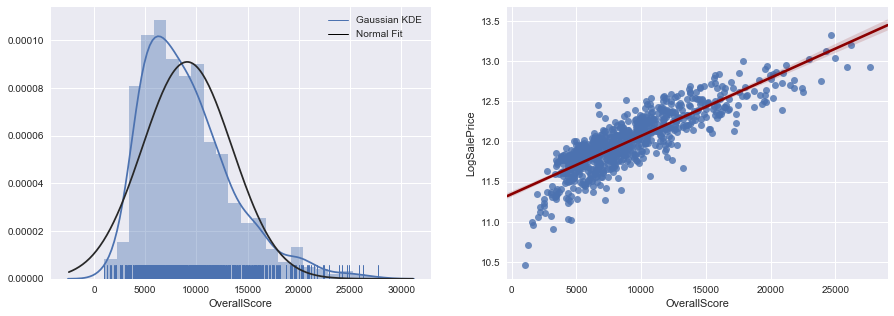

In [40]:
train["OverallScore"] = train["OverallQual"]*train["GrLivArea"]

fig, (ax1,ax2) = plotnum("OverallScore", "LogSalePrice", train)
plt.show()

- The distribution is slightly skewed
- It seems that the relationship between OverallScore and LogSalePrice is not quite linear
- We can improve this with a square root transformation

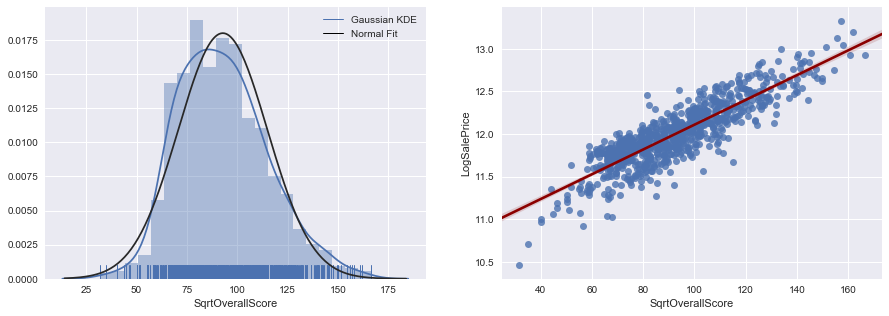

In [41]:
train["SqrtOverallScore"] = np.sqrt(train["OverallQual"]*train["GrLivArea"])

fig, (ax1,ax2) = plotnum("SqrtOverallScore", "LogSalePrice", train)
plt.show()

#### Residual diagnostics

In [42]:
# Run OLS
import statsmodels.formula.api as smf

formula = "LogSalePrice ~ SqrtOverallScore"
ols = smf.ols(formula=formula, data=train).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2478.
Date:                Mon, 06 Nov 2017   Prob (F-statistic):          1.65e-247
Time:                        16:28:19   Log-Likelihood:                 223.84
No. Observations:                 804   AIC:                            -443.7
Df Residuals:                     802   BIC:                            -434.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.6559      0.028  

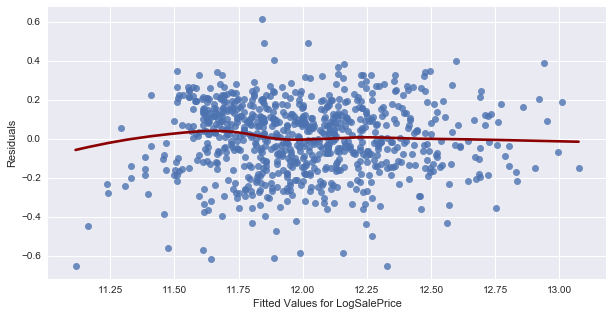

In [43]:
# Residual diagnostics
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=ols.fittedvalues, y=ols.resid, lowess=True, line_kws={"color":"darkred"}, ax=ax)
ax.set(xlabel="Fitted Values for LogSalePrice", ylabel="Residuals")
plt.show()

Notes:
- The results for the residual diagnostics are quite good.
- However, it seems that this model might be overestimating the "SalePrice" for houses with a low "SqrtOverallScore".
- Perhaps there are **other factors outside of area and quality** that heavily discount the "SalePrice".

#### Cross validation

In [44]:
# Standard setup
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

def rmse_cv(model, X_train, Y_train):
    kf=KFold(10, shuffle=True, random_state=1)
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

In [45]:
# Train SLR and perform cross validation on the RMSE
from sklearn.linear_model import LinearRegression

results = pd.DataFrame(columns=["Model", "mean(RMSE)", "SE(RMSE)"])

predictors = ["SqrtOverallScore"]
response = ["LogSalePrice"]

X_train = train[predictors]
Y_train = np.ravel(train[response])

slr = LinearRegression()
slr.fit(X_train, Y_train)
rmse = rmse_cv(slr, X_train, Y_train)
results.loc[0] = ["SLR", np.mean(rmse), np.std(rmse)]

results

,Model,mean(RMSE),SE(RMSE)
0,SLR,0.183051,0.013639


### Multiple Linear Regression

- More complex than SLR but can significantly improve predictive accuracy
- Prone to overfitting if irrelevant predictors are included

#### Check for skewness in predictors

- Linear models perform best when predictors are normally distributed.
- Therefore, we will apply tranformations on some of the numerical/ordinal predictors to reduce skewness.

In [46]:
from scipy.stats import skew

predictors = numerical + ordinal

skewed = pd.DataFrame(train[predictors].apply(lambda x: skew(x)).sort_values(ascending=False), columns=["Skewness"])
skewed = skewed[skewed["Skewness"] > 0.7].transpose()
skewed

,PoolArea,PoolQC,MiscVal,LowQualFinSF,3SsnPorch,LotArea,KitchenAbvGr,BsmtFinSF2,BsmtHalfBath,ScreenPorch,BsmtFinType2,EnclosedPorch,MasVnrArea,OpenPorchSF,Fence,ExterCond,WoodDeckSF,BsmtExposure,1stFlrSF,BsmtUnfSF,ExterQual,BsmtFinSF1,2ndFlrSF,GrLivArea
Skewness,20.219696,17.891629,14.683307,12.110995,11.723672,11.568594,4.702048,4.006789,3.915434,3.310937,2.887472,2.845632,2.558769,1.802706,1.715718,1.650262,1.516591,1.189932,0.945272,0.925477,0.862645,0.830329,0.757118,0.745633


In [47]:
# Apply log transformations to the training and test set for skewed variables
skewed = list(skewed.columns)
train[skewed] = np.log1p(train[skewed])
test[skewed] = np.log1p(test[skewed])

#### Standardise predictors

- It is important to standardise predictors when performing multiple linear regression

In [48]:
from sklearn.preprocessing import StandardScaler

predictors = numerical + ordinal # we don't scale nominal

scaler = StandardScaler()
scaler.fit(train[predictors]) # we will not use test when determining the scale

train[predictors] = scaler.transform(train[predictors])
test[predictors] = scaler.transform(test[predictors])

#### Model selection without dummy/engineered variables

- Our initial strategy is to train different models with just the numerical and ordinal predictors and ignore dummy/engineered variables for now
- Using cross validation, we will then compare the performance of different models

In [49]:
# This function trains OLS, Ridge, Lasso and Elastic Models with the given predictors
def linearmodels_cv(predictors, response, train):
    X_train = train[predictors]
    Y_train = np.ravel(train[response])

    results = pd.DataFrame(columns=["Model", "mean(RMSE)", "SE(RMSE)"])

    # Train OLS
    from sklearn.linear_model import LinearRegression
    ols = LinearRegression()
    ols.fit(X_train, Y_train)
    rmse = rmse_cv(ols, X_train, Y_train)
    results.loc[0] = ["OLS", np.mean(rmse), np.std(rmse)]

    # Train Ridge
    from sklearn.linear_model import RidgeCV

    alpha = np.exp(np.linspace(-10,20,500))
    ridge = RidgeCV(alphas=alpha, cv=5)
    ridge.fit(X_train, Y_train)
    rmse = rmse_cv(ridge, X_train, Y_train)
    results.loc[1] = ["Ridge", np.mean(rmse), np.std(rmse)]

    # Train Lasso
    from sklearn.linear_model import LassoCV

    lasso = LassoCV(cv=5)
    lasso.fit(X_train, Y_train)
    rmse = rmse_cv(lasso, X_train, Y_train)
    results.loc[2] = ["Lasso", np.mean(rmse), np.std(rmse)]

    # Train Elastic Net
    from sklearn.linear_model import ElasticNetCV

    enet = ElasticNetCV(l1_ratio=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99], cv=5)
    enet.fit(X_train, Y_train)
    rmse = rmse_cv(enet, X_train, Y_train)
    results.loc[3] = ["Elastic Net", np.mean(rmse), np.std(rmse)]

    return results

In [50]:
predictors = numerical + ordinal
results = linearmodels_cv(predictors, response, train)
results

,Model,mean(RMSE),SE(RMSE)
0,OLS,0.098943,0.009094
1,Ridge,0.099410,0.010457
2,Lasso,0.098506,0.010838
3,Elastic Net,0.098645,0.010967


Notes:
- The results are significantly better than simple linear regression.
- Given that all models perform similarly, Lasso seems more attractive as it is simpler and easier to interpret with less variables.
- Let's add dummy/engineered variables to see how each model responds.

#### Include dummy variables

In [51]:
train[dummies].head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_nan,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,MiscFeature_Shed,MiscFeature_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [52]:
predictors = numerical + ordinal + dummies
results = linearmodels_cv(predictors, response, train)
results

,Model,mean(RMSE),SE(RMSE)
0,OLS,1.088330e+12,3.216211e+12
1,Ridge,9.075948e-02,8.022378e-03
2,Lasso,9.053344e-02,7.360095e-03
3,Elastic Net,9.067610e-02,7.332051e-03


Notes:
- With the addition of new variables, many of which are irrelevant, we can see that OLS suffers greatly since it does not incorporate any regularisation.
- For the other models with regularisation, we again see significant improvements in the results.
- We can also see that Lasso starts to slightly outperform the other models as it is more robust to weak predictors due to its ability to perform feature selection. This is consistent with what we expect when only a small subset of the variables are relevant for predicting "SalePrice".
- We will select Lasso as our preferred model and continue to further understand the selected features and improve our model.

#### Lasso

In [54]:
from sklearn.linear_model import LassoCV

results = pd.DataFrame(columns=["Model", "mean(RMSE)", "SE(RMSE)"])

# Train Lasso with numerical predictors
predictors = numerical
X_train = train[predictors]
Y_train = np.ravel(train[response])

lasso_basic = LassoCV(cv=5)
lasso_basic.fit(X_train, Y_train)
rmse = rmse_cv(lasso_basic, X_train, Y_train)
results.loc[0] = ["Lasso(num)", np.mean(rmse), np.std(rmse)]

# Train Lasso with numerical and ordinal predictors
predictors = numerical + ordinal
X_train = train[predictors]
Y_train = np.ravel(train[response])

lasso_basic = LassoCV(cv=5)
lasso_basic.fit(X_train, Y_train)
rmse = rmse_cv(lasso_basic, X_train, Y_train)
results.loc[1] = ["Lasso(num,ord)", np.mean(rmse), np.std(rmse)]

# Train Lasso with numerical, ordinal and dummy predictors
predictors = numerical + ordinal + dummies
X_train = train[predictors]
Y_train = np.ravel(train[response])

lasso_basic = LassoCV(cv=5)
lasso_basic.fit(X_train, Y_train)
rmse = rmse_cv(lasso_basic, X_train, Y_train)
results.loc[2] = ["Lasso(num,ord,dum)", np.mean(rmse), np.std(rmse)]

results

,Model,mean(RMSE),SE(RMSE)
0,Lasso(num),0.126925,0.015478
1,"Lasso(num,ord)",0.098506,0.010838
2,"Lasso(num,ord,dum)",0.090533,0.007360


Notes:
- We will start by filtering out numerical and ordinal variables.
- Here, we aim to **reduce SE(RMSE)** without significantly degrading the mean(RMSE).

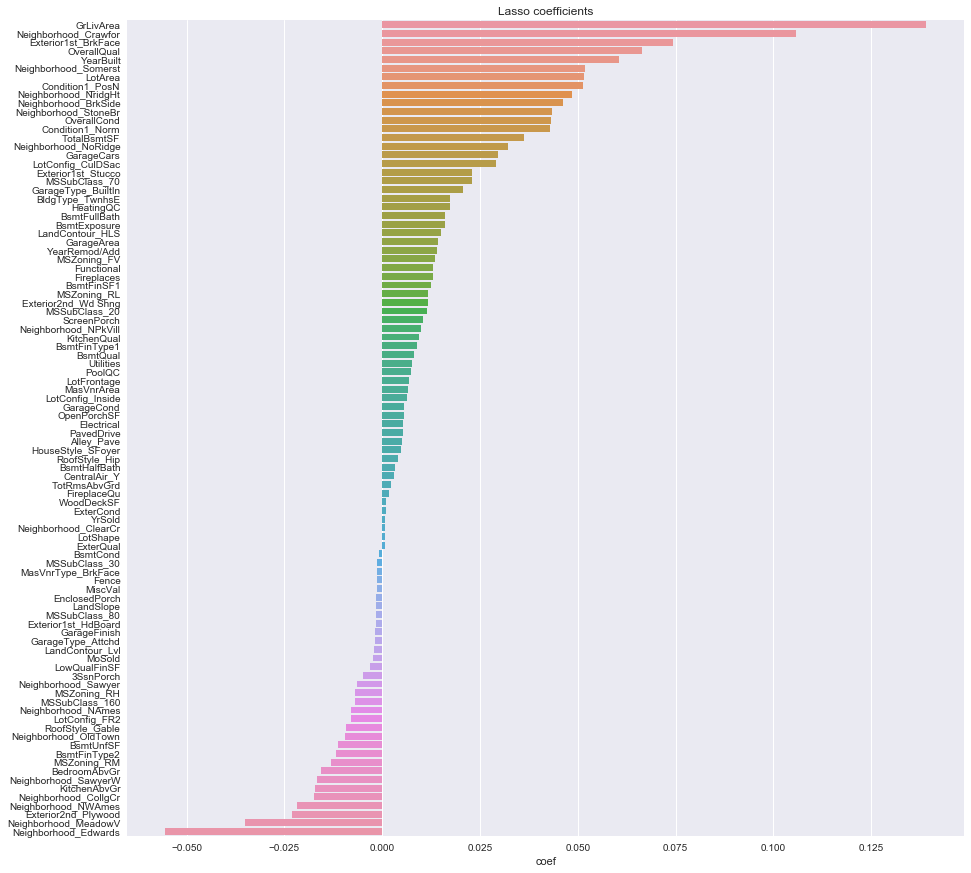

In [55]:
# Bar plot of the coefficients obtained from Lasso
coef = pd.DataFrame(lasso_basic.coef_, index = X_train.columns, columns=["coef"]).sort_values(by="coef", ascending=False)
coef = coef[abs(coef["coef"]) > 0]

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x=coef.coef, y=coef.index)
ax.set(title="Lasso coefficients")
plt.show()

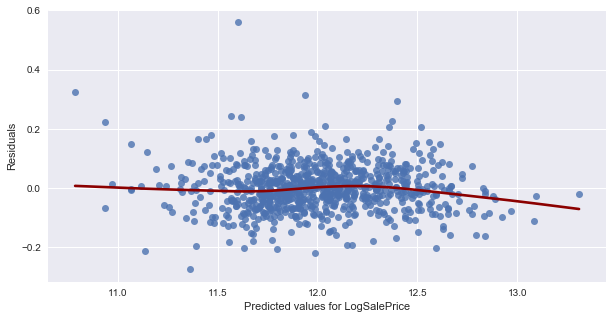

In [56]:
# Residual diagnostics (with basic dummies)
log_pred = lasso_basic.predict(train[predictors])
residuals = log_pred - train["LogSalePrice"]

fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x=log_pred, y=residuals, lowess=True, line_kws={"color":"darkred"}, ax=ax)
ax.set(xlabel="Predicted values for LogSalePrice", ylabel="Residuals")
plt.show()

Notes:
- The results for the residual diagnostics appears to be good.
- However, Lasso still returns many coefficients, i.e. many predictors.
- This model achieves approximately 18000 RMSE on Kaggle. We **submitted** this model to Kaggle as our benchmark for MLR.
- To improve Lasso, we want to trim weak predictors to avoid overfitting.
- Here, we will try **bootstrapping** the coefficients and iteratively filter out predictors which do not appear to be robust.

In [57]:
# This function simulates 100 bootstrap samples and returns the coefficients as determined by lasso
def bootstrap_lasso(predictors, train):
    # Bootstrap coefficients for numerical variables with 100 samples
    bootstrap_coefs = pd.DataFrame(columns=predictors)
    for i in range(0,100):
        idx = np.random.randint(len(train), size=len(train))
        X_train = train[predictors].iloc[idx,:]
        Y_train = np.ravel(train[response])[idx]
        lasso = LassoCV(cv=5)
        lasso.fit(X_train, Y_train)
        bootstrap_coefs.loc[i] = lasso.coef_
    return bootstrap_coefs

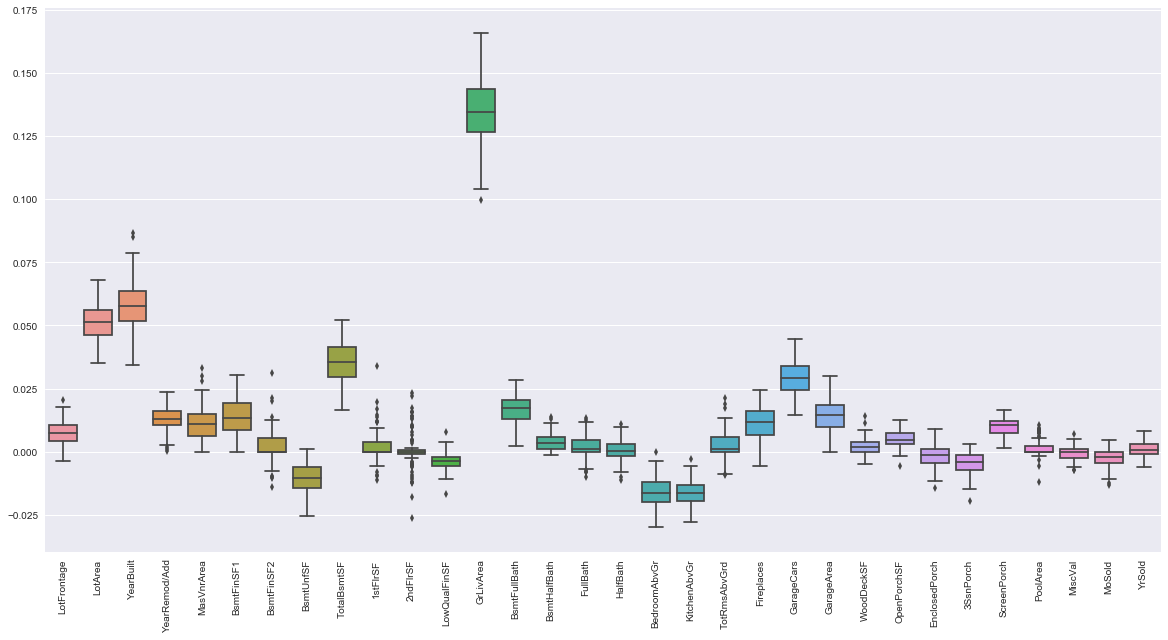

In [58]:
bootstrap_coefs = bootstrap_lasso(predictors, train)

# Boxplot of coefficients for numerical predictors
fig, ax= plt.subplots(figsize=(20,10))
sns.boxplot(data=bootstrap_coefs[numerical], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

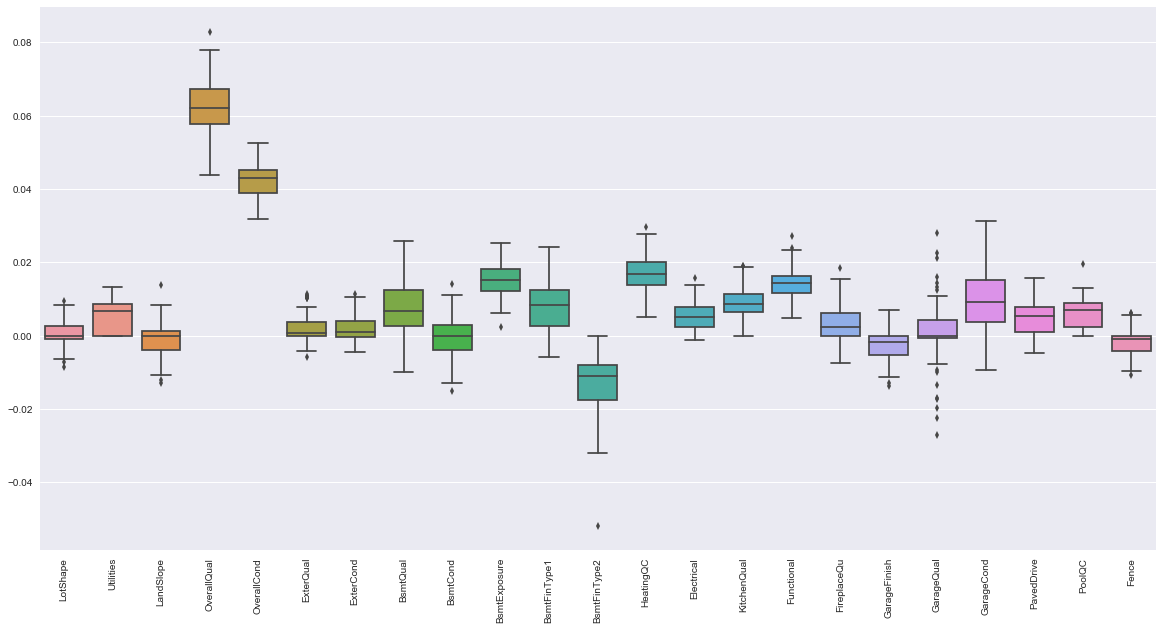

In [59]:
# Boxplot of coefficients for ordinal predictors
fig, ax= plt.subplots(figsize=(20,10))
sns.boxplot(data=bootstrap_coefs[ordinal], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [60]:
# Remove the weak predictors
weak_predictors = [
    # Numerical
    "LotFrontage",
    "BsmtFinSF2",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GarageArea", # correlated with GarageCars
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "WoodDeskSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "BedroomAbvGr", # doesn't make sense (see EDA)
    "KitchenAbvGr", # doesn't make sense (see EDA)
    
    # Ordinal
    "LotShape",
    "LandSlope",
    "ExterQual",
    "ExterCond",
    "BsmtCond",
    "GarageFinish",
    "GarageQual",
    "PoolQC", # consider changing to dummy
    "Fence", # consider changing to dummy
]

numerical = [var for var in numerical if var not in weak_predictors]
ordinal = [var for var in ordinal if var not in weak_predictors]

In [64]:
# Check Lasso perfomance after filtering
predictors = numerical + ordinal + dummies
X_train = train[predictors]
Y_train = np.ravel(train[response])
lasso_filt = LassoCV(cv=5)
lasso_filt.fit(X_train, Y_train)
rmse = rmse_cv(lasso_filt, X_train, Y_train)
results.loc[3] = ["Lasso(filt1)", np.mean(rmse), np.std(rmse)]

results

,Model,mean(RMSE),SE(RMSE)
0,Lasso(num),0.126925,0.015478
1,"Lasso(num,ord)",0.098506,0.010838
2,"Lasso(num,ord,dum)",0.090533,0.007360
3,Lasso(filt1),0.090897,0.007590


Notes:
- We were able to remove 28 variables without significantly affecting the mean(RMSE) or SE(RMSE).
- Let's remove a few more.

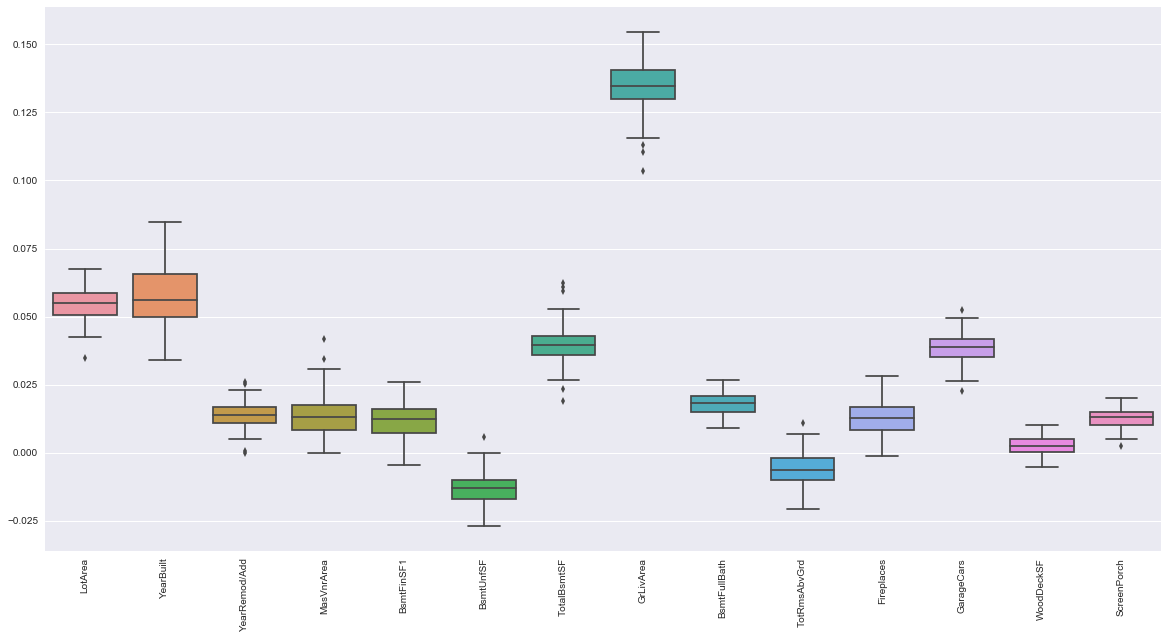

In [65]:
bootstrap_coefs = bootstrap_lasso(predictors, train)

# Boxplot of coefficients for numerical predictors
fig, ax= plt.subplots(figsize=(20,10))
sns.boxplot(data=bootstrap_coefs[numerical], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

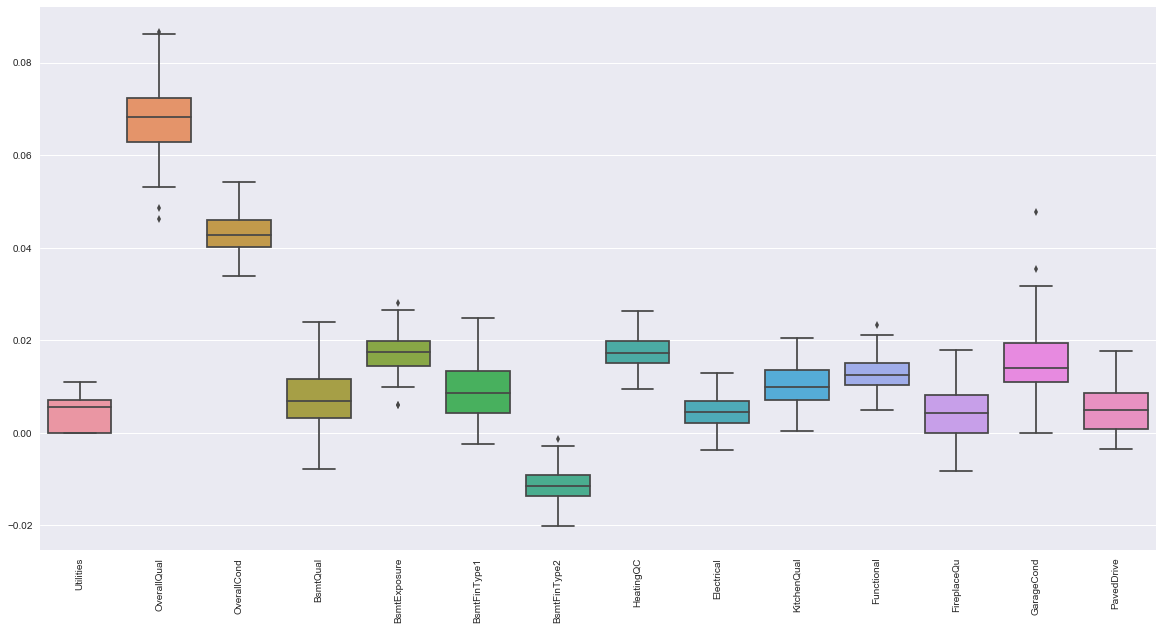

In [66]:
# Boxplot of coefficients for ordinal predictors
fig, ax= plt.subplots(figsize=(20,10))
sns.boxplot(data=bootstrap_coefs[ordinal], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [67]:
# Remove the weak predictors
weak_predictors = [
    # Numerical
    "BsmtUnfSF",
    "WoodDeckSF",
    
    # Ordinal
    "Utilities",
    "FireplaceQu"
]

numerical = [var for var in numerical if var not in weak_predictors]
ordinal = [var for var in ordinal if var not in weak_predictors]

In [68]:
# Check Lasso perfomance after filtering
predictors = numerical + ordinal + dummies
X_train = train[predictors]
Y_train = np.ravel(train[response])
lasso_filt.fit(X_train, Y_train)
rmse = rmse_cv(lasso_filt, X_train, Y_train)
results.loc[4] = ["Lasso(filt2)", np.mean(rmse), np.std(rmse)]

results

,Model,mean(RMSE),SE(RMSE)
0,Lasso(num),0.126925,0.015478
1,"Lasso(num,ord)",0.098506,0.010838
2,"Lasso(num,ord,dum)",0.090533,0.007360
3,Lasso(filt1),0.090897,0.007590
4,Lasso(filt2),0.090634,0.007475


Notes:
- It seems our strategy of using bootstrap to identify weak predictors is working.
- We will now see how the model responds if we narrow down our top dummy variables.

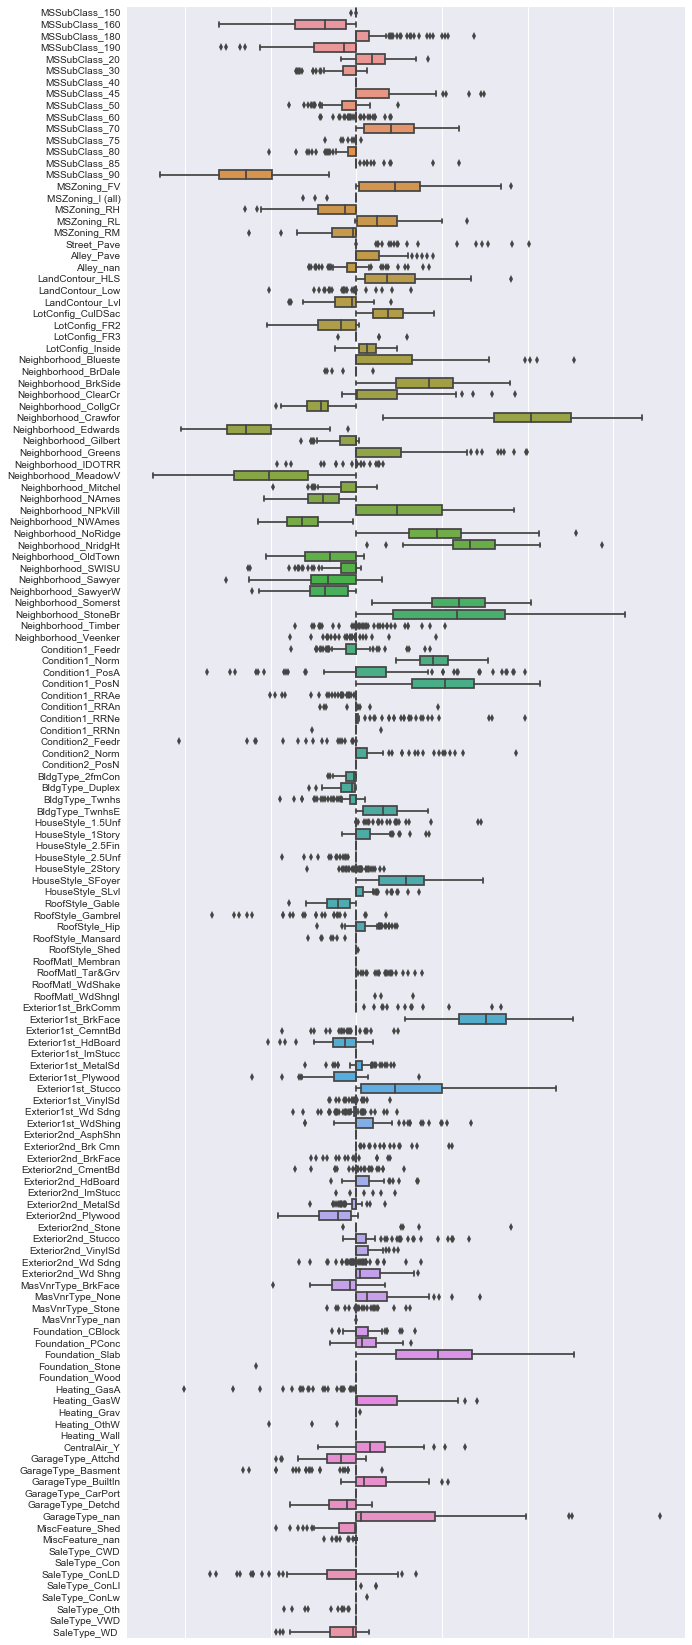

In [69]:
bootstrap_coefs = bootstrap_lasso(predictors, train)

# Boxplot of coefficients for dummy predictors
fig, ax = plt.subplots(figsize=(10,30))
sns.boxplot(data=bootstrap_coefs[dummies], orient="h", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [81]:
# Select top dummies
dummies = [
    "MSSubClass_160",
    "MSSubClass_70",
    "MSSubClass_90",
    "MSZoning_FV",
    "MSZoning_RM",
    "MSZoning_RH",
    "Neighborhood_Crawfor",
    "Neighborhood_Edwards",
    "Neighborhood_MeadowV",
    "Neighborhood_NoRidge",
    "Neighborhood_NridgHt",
    "Neighborhood_Somerst",
    "Neighborhood_StoneBr",
    "Condition1_Norm",
    "Condition1_PosN",
    "HouseStyle_SFoyer",
    "Exterior1st_BrkFace",
    "Foundation_Slab"
]

In [82]:
# Check Lasso perfomance after filtering
predictors = numerical + ordinal + dummies
X_train = train[predictors]
Y_train = np.ravel(train[response])
lasso_filt.fit(X_train, Y_train)
rmse = rmse_cv(lasso_filt, X_train, Y_train)
results.loc[5] = ["Lasso(filt3)", np.mean(rmse), np.std(rmse)]

results

,Model,mean(RMSE),SE(RMSE)
0,Lasso(num),0.126925,0.015478
1,"Lasso(num,ord)",0.098506,0.010838
2,"Lasso(num,ord,dum)",0.090533,0.007360
3,Lasso(filt1),0.090897,0.007590
4,Lasso(filt2),0.090634,0.007475
5,Lasso(filt3),0.089787,0.007238


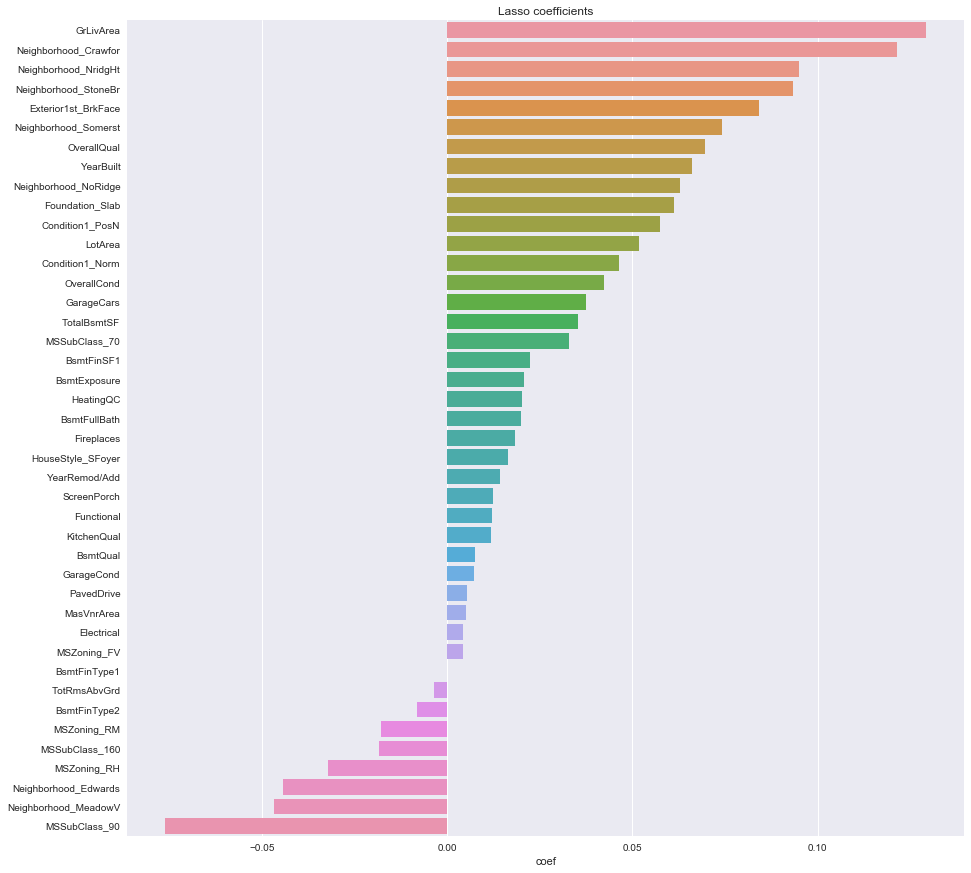

In [83]:
# Bar plot of the coefficients obtained from Lasso
coef = pd.DataFrame(lasso_filt.coef_, index = X_train.columns, columns=["coef"]).sort_values(by="coef", ascending=False)
coef = coef[abs(coef["coef"]) > 0]

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x=coef.coef, y=coef.index)
ax.set(title="Lasso coefficients")
plt.show()

#### Summary of MLR
- Lasso is the preferred model as only a small subset of features are useful for predicting the "SalePrice".
- Bootstrapping the lasso coefficients seems to be effective for trimming out weak predictors without degrading the performance. We anticipate that this will reduce overfitting.
- Now that we have a good baseline of predictors, we can make further improvements with more feature engineering.

## Non-Linear Models

### Gradient Boosting Regression

- Works by building an ensemble of weak learners; in this case regression trees
- Improves on past weak learners by combining them into a strong learner in an iterative fashion
- Each weak learner is improved by constantly adding a new estimator to the previous model; the residuals are constantly updated to minimize the loss function

Gradient boosting generally gives optimal results in comparison to linear methods.

There are several ways to optimise a gradient boosted model.

In [74]:
param_grid={'n_estimators':[1000,1500,2000],
            'learning_rate':[0.001,0.005,0.01,0.03,0.05],
            'max_depth':[2,4,6],
            'subsample': [0.6,0.7,0.8]}
n_jobs = 5

In order to get the most out of this model, the parameters need to be tuned. In this case we identify 4 major features:

1. The number of base classifiers
2. The learning rate 
3. The tree node complexity

Each feature is important to prevent the model from overfitting/underfitting, and requires a correct balance to ensure that major trends are captured while preventing the model from incorporating noise.

Typically, increasing the number of base classifiers allows the model to learn much better from each of its learners. However, doing so beyond a certain number is likely to lead to overfitting. 

The regularisation parameter/learning rate is the rate at which a model optimises its base classifiers. Generally low learning rates are preferred to avoid overfitting and improve its generalisation ability. However, this comes at a cost of increasing computational time. The learning rate will need to be tuned in accordance to the number of base classifiers.

The max depth is the complexity of the regression tree. This controls how well the learner is likely to generalise to a sample. It is suggested to use a max depth of 2-8 to prevent the learner from capturing noise specific to a sample.

Sub-sampling increases the bias error component while reducing the variance error. It has been suggested that a sub-sampling rate of 0.8 is preferrable.

There are many other parameters that could be optimised in addition to the 4 main features listed above. These include the 'max_features' and 'min_samples_split' parameters. 

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.1)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, Y_train)
    print ("Best Estimator:")
    print (classifier.best_estimator_)
    
    return cv, classifier.best_estimator_

Grid search is required to obtain the best parameters for the model. We set a parameter grid with a number of specifications for each main feature. We limit the number of specifications to reduce computational time.

Here, Shuffle Split is used over KFold partitions for the same reason. While KFold tests each fold of the training data set, this becomes more difficult as the dataset increases in size. 

In [174]:
cv, best_est = GradientBooster(param_grid, n_jobs)

Best Estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.03, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, presort='auto', random_state=None,
             subsample=0.7, verbose=0, warm_start=False)


We print out all the best parameters.

In [177]:
# Print best estimator parameters

print ("Best Estimator Parameters:")
print ("--------------------------")
print ("n_estimators: %d" % best_est.n_estimators)
print ("max_depth: %d" % best_est.max_depth)
print ("learning_rate: %.3f" % best_est.learning_rate)
print ("subsample: %.1f" % best_est.subsample)

print ()
print ("Train R-Squared: %.2f" % best_est.score(X_train, Y_train))

Best Estimator Parameters:
--------------------------
n_estimators: 2000
max_depth: 2
learning_rate: 0.030
subsample: 0.7

Train R-Squared: 0.99


We define a function to print out the training score and the cross-validated score.

In [178]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(0.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve (
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label="CV Score")
    plt.legend(loc="best")
    return plt

We then plot out the curve.

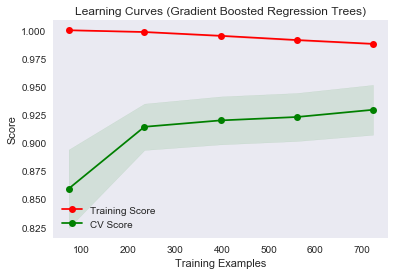

In [180]:
from sklearn.model_selection import learning_curve
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, 
                                      max_depth=best_est.max_depth,
                                      learning_rate=best_est.learning_rate,
                                      subsample=best_est.subsample)
plot_learning_curve(estimator, title, X_train, Y_train, cv=cv, n_jobs=n_jobs)
plt.show()

Here we can see that the curve for the training score and cross-validated score has a large gap. This means that the curve is most likely overfitting and capturing noise in the data. To improve on this model, more data transformation will be required to transform or rescale the predictors to reduce the gap. 

## Output Predictions

In [ ]:
# Make predictions using basic Lasso model
log_pred = lasso_filt.predict(test[predictors])
pred = np.exp(log_pred)
predictions["Prediction"] = pred
predictions.to_csv("predictions_lasso_basic.csv", index=False)

# Make predictions using GBR
log_pred = estimator.predict(test[predictors])
pred = np.exp(log_pred)
predictions["Prediction"] = pred
predictions.to_csv("predictions_gbr.csv", index=False)